# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [397]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [398]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [399]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [400]:
# TODO: Begin your EDA
transactions.rename(columns={"oldbalanceOrg": "oldbalanceOrig"}, inplace=True)
transactions.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


## Univariate EDA

- We see that average isFraud (the proportion of 1's [True] to 0's [False]) is 0.001297
    - Multiplyting this average with the count of all data points, we get: 1,297 actually fraudulent transactions
    - Knowing this gives a better idea of how sensitive classification needs to be...
- Similarly, we can see that the average isFlaggedFraud is 0.000001
    - Only ONE transaction isFlaggedFraud!

In [401]:
# Check for missing values
transactions.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [402]:
# Check for repeat nameOrig and nameDest transactions

unique_orig = transactions["nameOrig"].nunique()
unique_dest = transactions["nameDest"].nunique()

print("Unique Origin Acc.:", unique_orig)
print("Unique Destination Acc.:", unique_dest)
print("---------------------------------------------------------------")
print("Remaining non-unique Origin Acc.:", 1000000 - unique_orig)
print("Remaining non-unique Origin Acc.:", 1000000 - unique_dest)

Unique Origin Acc.: 999771
Unique Destination Acc.: 648257
---------------------------------------------------------------
Remaining non-unique Origin Acc.: 229
Remaining non-unique Origin Acc.: 351743


## Observations:
- There are origin and destination accounts that appear more than once

In [403]:
# Identifying the origin and destination accounts that appear more than once
duplicate_orig = transactions[transactions.duplicated(subset=["nameOrig"], keep=False)]
duplicate_dest = transactions[transactions.duplicated(subset=["nameDest"], keep=False)]

grouped_duplicate_orig = duplicate_orig.groupby(["nameOrig"])
group_counts_orig = grouped_duplicate_orig.size()

grouped_duplicate_dest = duplicate_dest.groupby("nameDest")
group_counts_dest = grouped_duplicate_dest.size()

print("Duplicate Origin Accounts:\n", group_counts_orig)
print("---------------------------------------------------------------")
print("Duplicate Destination Accounts:\n", group_counts_dest)
print("---------------------------------------------------------------")

###########################################################################

# Just to see what kind of repeats we are dealing with
print("Max Acc. Origin Reps:", group_counts_orig.values)
print("Max Acc. Destination Reps:", group_counts_dest.values)


Duplicate Origin Accounts:
 nameOrig
C100367851     2
C1004685418    2
C1011575884    2
C1016949303    2
C1018801502    2
              ..
C938168688     2
C94300243      2
C96045998      2
C97308318      2
C982719969     2
Length: 229, dtype: int64
---------------------------------------------------------------
Duplicate Destination Accounts:
 nameDest
C1000015936    4
C1000022185    4
C1000030947    4
C1000038201    5
C1000044204    2
              ..
M773387373     2
M884553151     2
M891225462     2
M914809512     2
M969930573     2
Length: 155880, dtype: int64
---------------------------------------------------------------
Max Acc. Origin Reps: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [404]:
# Analyzing grouped duplicate_dest accounts:

print("Grouped duplicate_dest by 'nameDest':\n", grouped_duplicate_dest.value_counts().tail(13))  # using .value_counts() for easier viewing (remember: last column is count, not isFlaggedFraud)
print("--------------GROUP COUNTS DEST---------------------\n")
print(group_counts_dest)

# Extracting counts of duplicate_dest accounts greater than 2
print("-------------- > 2 ---------------------\n")
greater_duplicate_dest = group_counts_dest[group_counts_dest > 2]
print("Duplicate Destination Accounts with Count > 2:\n", greater_duplicate_dest)
print("Max Duplicate Destination Account:\n", greater_duplicate_dest.max())

print("-------------- 22 ---------------------\n")
max_duplicate_dest = group_counts_dest[group_counts_dest == 22]
print("Account of interest:\n", max_duplicate_dest)

Grouped duplicate_dest by 'nameDest':
 nameDest    type     amount    nameOrig     oldbalanceOrig  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
M569810311  PAYMENT  34452.99  C1975727416  963.00          0.00            0.0             0.0             0        0                 1
M685108850  PAYMENT  29257.04  C2063027987  0.00            0.00            0.0             0.0             0        0                 1
                     34969.23  C1340928427  0.00            0.00            0.0             0.0             0        0                 1
M773387373  PAYMENT  15906.14  C1361728013  0.00            0.00            0.0             0.0             0        0                 1
                     25534.49  C1360981352  0.00            0.00            0.0             0.0             0        0                 1
M884553151  PAYMENT  13054.72  C946597118   0.00            0.00            0.0             0.0             0        0                 1
       

## Observations:
- We have a max of 2 origin transactions per non-unique transaction (229 accounts)
- We have 155,880 destination accounts that appear in more than one transaction
- 85,004 destination accounts appear more than 2 times
- Account C2083562754 appears 22 times!

## Questions:
- How many transactions, with destination accounts that appear more than once, are flagged (isFlaggedFraud == 1)?
- Are any of these transactions actually fraud (isFraud == 1)?
- (Destination account C2083562754 appears 22 times!) Are all those instances actual fraud, or flagged fraud?

In [405]:
# Extracting data where isFlaggedFraud == 1 (DESTINATION)
flagged_fraud_dest_rows = duplicate_dest[duplicate_dest["isFlaggedFraud"] == 1]
print(flagged_fraud_dest_rows)

Empty DataFrame
Columns: [type, amount, nameOrig, oldbalanceOrig, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [406]:
# Extracting data where isFraud == 1      (DESTINATION)
fraud_dest_rows = duplicate_dest[duplicate_dest["isFraud"] == 1]
print(fraud_dest_rows)

            type      amount     nameOrig  oldbalanceOrig  newbalanceOrig  \
439     CASH_OUT   530354.58  C1119661582       530354.58             0.0   
2168    CASH_OUT   841052.98  C1776675634       841052.98             0.0   
6633    CASH_OUT   150929.12  C1873591619       150929.12             0.0   
10513   TRANSFER   581421.85  C1021314422       581421.85             0.0   
14217   CASH_OUT  1005365.24  C2007750863      1005365.24             0.0   
...          ...         ...          ...             ...             ...   
981704  CASH_OUT  8020192.15  C1073081182      8020192.15             0.0   
990076  TRANSFER    29707.86  C1825456600        29707.86             0.0   
994954  TRANSFER   244068.01  C1087133093       244068.01             0.0   
997654  CASH_OUT  1421665.98   C467140343      1421665.98             0.0   
998998  CASH_OUT  1749325.14  C1029257629      1749325.14             0.0   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFrau

In [407]:
# Extracting data where isFlaggedFraud == 1 (ORIGIN)
flagged_fraud_orig_rows = duplicate_orig[duplicate_orig["isFlaggedFraud"] == 1]
print(flagged_fraud_orig_rows)

Empty DataFrame
Columns: [type, amount, nameOrig, oldbalanceOrig, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [408]:
# Extracting data where isFraud == 1      (ORIGIN)
fraud_orig_rows = duplicate_orig[duplicate_orig["isFraud"] == 1]
print(fraud_orig_rows)

Empty DataFrame
Columns: [type, amount, nameOrig, oldbalanceOrig, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [409]:
# Taking a closer look at the C2083562754 destination transactions
fraud_dest_rows_max = duplicate_dest[duplicate_dest["nameDest"] == 'C2083562754']
fraud_dest_rows_max = fraud_dest_rows_max[fraud_dest_rows_max["isFraud"] == 1]
print(fraud_dest_rows_max)

Empty DataFrame
Columns: [type, amount, nameOrig, oldbalanceOrig, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


## Observations:
- None of the duplicate origin accounts were in any fraudulent transactions
    - None of these transactions were flagged as fraud
* 532 transactions involving duplicate destination accounts were fraud!
    - None of these transactions were correctly identified as fraud...
    - This is more than a third of all truly fraud transactions!
- Destination account C2083562754 had no instances of fraud
    - None of these transactions were flagged fraud, either

## Questions:
- What is common amongst the fraudulent dup. transactions?
- What is it about the transactions involving destination account C2083562754 that indicate non-fraudulent behavior?
- Could this knowledge be used to build a better predictor?

## Approach:
- Visualize each set's transaction amt and types (old/new balanceOrig and old/new balanceDest did not give interpretable results)

(507623, 10)
(507091, 10)


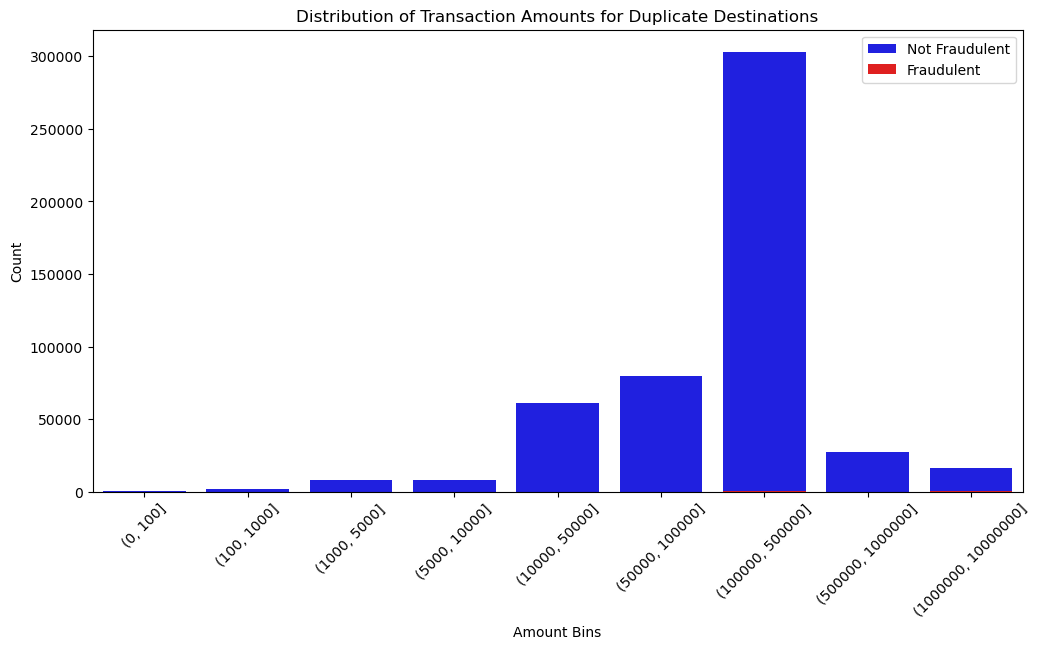

In [410]:
# Separating the fraud transactions from the not fraud ones, amongst the duplicate set: 
# duplicate_dest_dropped(a) vs. fraud_dest_rows(b)

print(duplicate_dest.shape)
duplicate_dest_dropped = duplicate_dest.drop(axis=0, index=fraud_dest_rows.index)
print(duplicate_dest_dropped.shape)

# Visualizing transaction amt first...

bins = [0, 100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 10000000]
binned_amount_a = pd.cut(duplicate_dest_dropped["amount"], bins=bins) # Note: returned pd Series of labels (intervals?)
bin_counts_a = binned_amount_a.value_counts().sort_index()  # Extract unique bin labels
bin_labels = bin_counts_a.index.astype(str)  # Extract bin labels

binned_amount_b = pd.cut(fraud_dest_rows["amount"], bins=bins)
bin_counts_b = binned_amount_b.value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.barplot(x=bin_labels, y=bin_counts_a.values, label='Not Fraudulent', color='blue')
sns.barplot(x=bin_labels, y=bin_counts_b.values, label='Fraudulent', color='red')
plt.xticks(rotation=45)
plt.xlabel('Amount Bins')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amounts for Duplicate Destinations')
plt.legend()
plt.show()



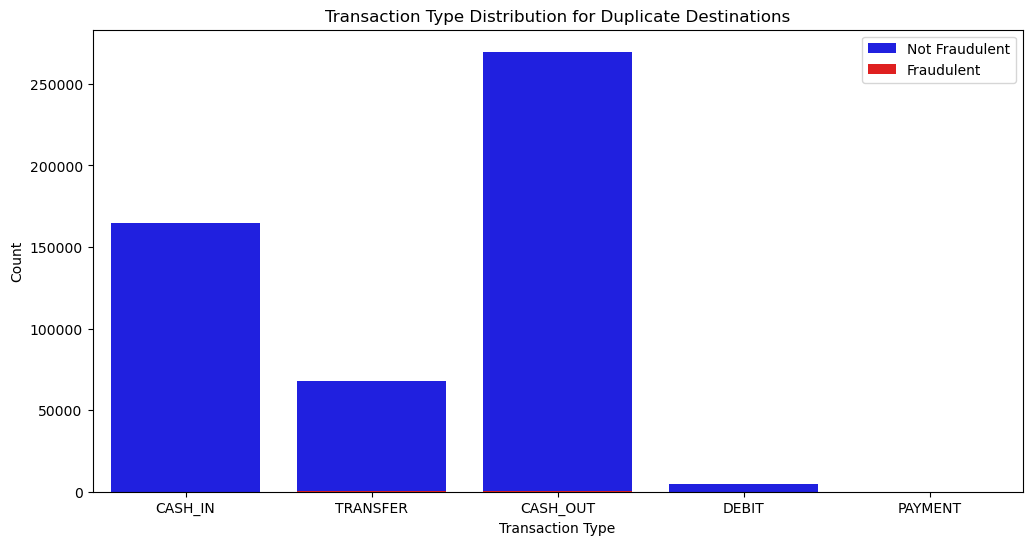

In [411]:
# Visualizing type
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=duplicate_dest_dropped, label='Not Fraudulent', color='blue')
sns.countplot(x='type', data=fraud_dest_rows, label='Fraudulent', color='red')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Type Distribution for Duplicate Destinations')
plt.legend()
plt.show()

## Observations:
- Amounts between 100,000 and 10,000,000 and were duplicate destined, more likely to be fraudulent
- TRANSFER and CASH_OUT transacttions, more likely to be fraudulent

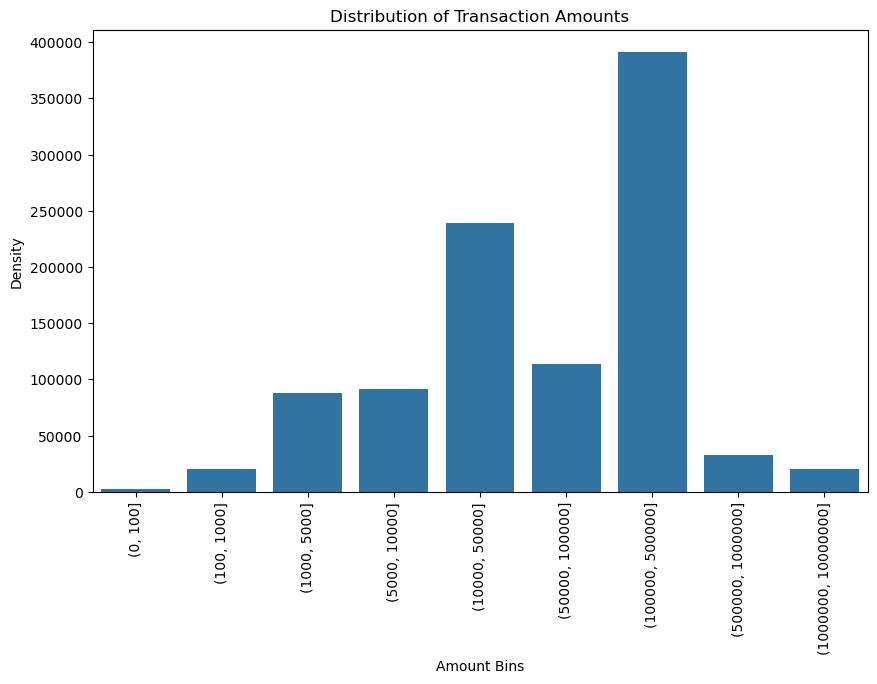

In [412]:
# Distribution of ["amount"]:

binned_amount = pd.cut(transactions["amount"], bins=bins) # Note: returned pd Series of labels (intervals?)
bin_counts = binned_amount.value_counts().sort_index()  # Extract unique bin labels
bin_labels = bin_counts.index   # Extract bin labels

plt.figure(figsize=(10, 6))
sns.barplot(x=bin_labels, y=bin_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Amount Bins")
plt.ylabel("Density")
plt.title("Distribution of Transaction Amounts")
plt.show()

/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_25456/3469256473.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = transactions.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")


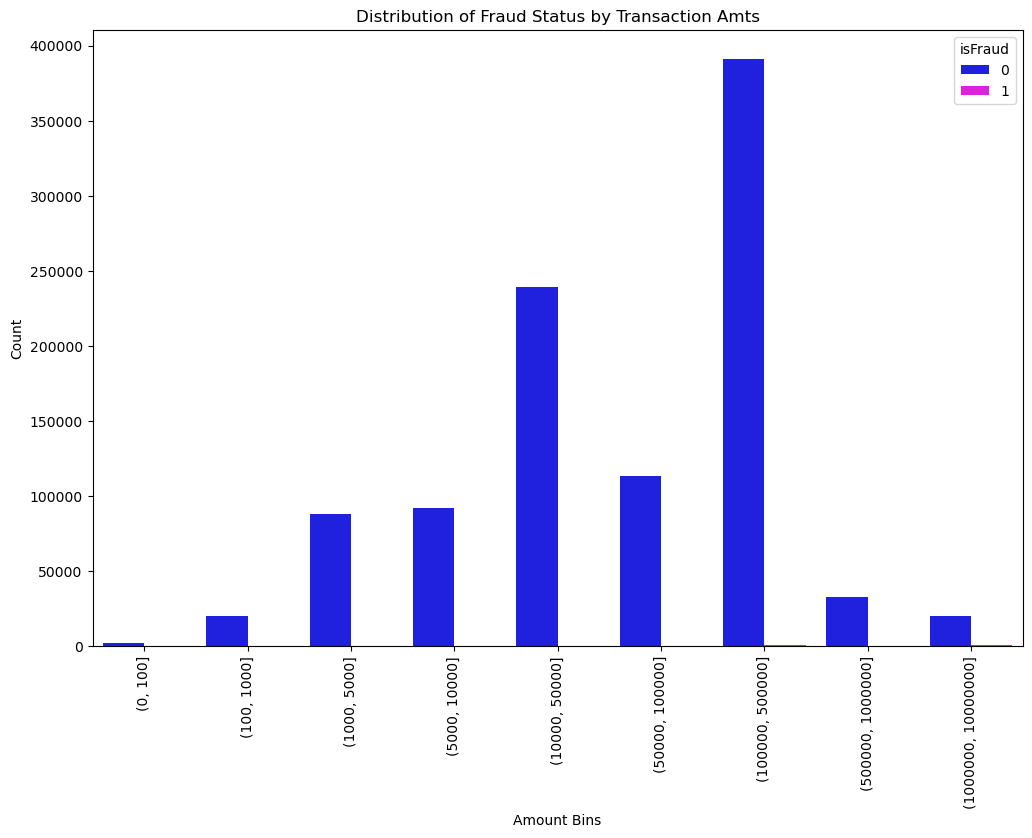

In [423]:
# Visualizing the amounts of transactions that are actual fraud, by transaction amount

bins = [0, 100, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 10000000]
binned_amount = pd.cut(transactions["amount"], bins=bins)
transactions["amt_bins"] = binned_amount

# Group data by bins and fraud flags
fraud_counts = transactions.groupby(["amt_bins", "isFraud"]).size().reset_index(name="count")

plt.figure(figsize=(12, 8))
sns.barplot(data=fraud_counts, x="amt_bins", y="count", hue="isFraud", palette={True: "magenta", False: "blue"})

plt.xticks(rotation=90)
plt.xlabel("Amount Bins")
plt.ylabel("Count")
plt.title("Distribution of Fraud Status by Transaction Amts")
plt.show()

## Observations:
- Some transactions > 100,000 are fraud, though none appear to be flagged
- Very difficult to tell visually (due to there being only one flagged transaction)

## Questions:
- Are most (if not all) of the fraudulent transactions > 100,000?
- How many of them are accurately flagged?

In [414]:
transactions[(transactions["amount"] > 100000) & (transactions["isFraud"] == 1 )].shape

(1021, 11)

In [415]:
transactions[(transactions["amount"] > 100000) & (transactions["isFlaggedFraud"] == 1 )].shape

(1, 11)

- Out of 1,297 fraud transactions, 1,021 of them involve amounts greater than 100,000
- 78.72% of all fraud...

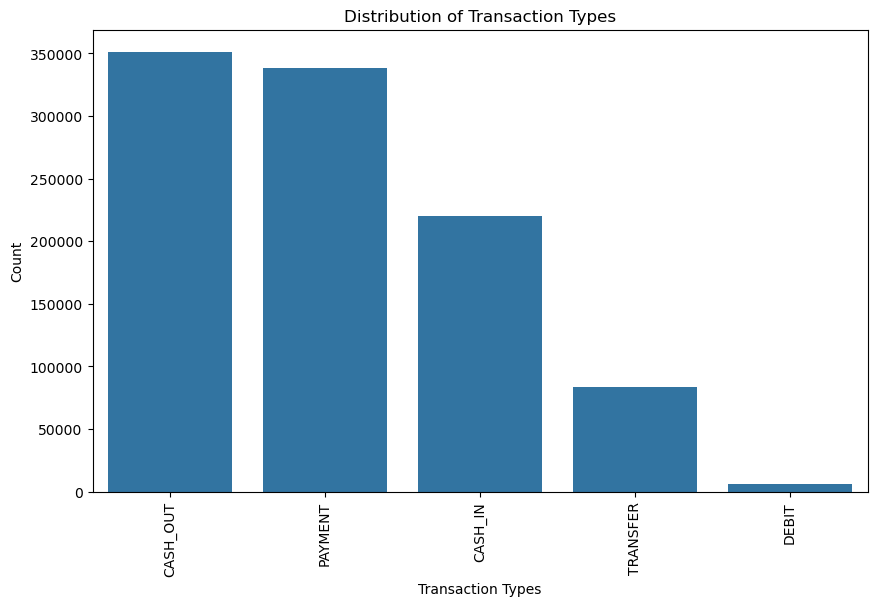

In [416]:
# Distribution of ["type"]:

# Count the amt of each type
num_ttc = transactions["type"].value_counts()
# Separate out transaction types
trans_types = transactions["type"].value_counts().index

# Plot the data

plt.figure(figsize=(10, 6))
sns.barplot(x=trans_types, y=num_ttc.values)
plt.xticks(rotation=90)
plt.xlabel("Transaction Types")
plt.ylabel("Count")
plt.title("Distribution of Transaction Types")
plt.show()

## BIVARIATE EDA

## Multivariate EDA

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## NOTES (FOR FURTHER ANALYSIS):
- Would including a column determining whether a transaction is > 100,000 make for better predictions in the model(s)?
- Could destination account C2083562754 transactions be used as a check/example for instances where a destination account appears many times (over some identifiable threshold)?